<a href="https://colab.research.google.com/github/111055/NLP/blob/master/Challenge4_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

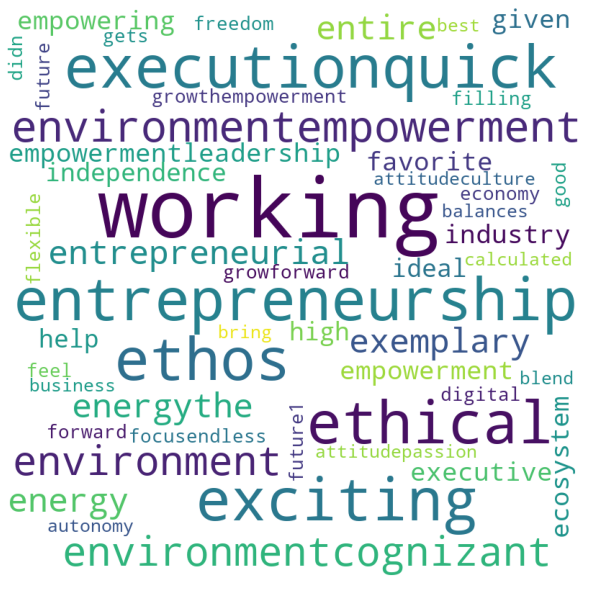

In [205]:
#!/usr/bin/python3

import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

# Function to read the html content very specific to What is your favorite thing about Cognizant?
def htmlreader(file):
  with open(file, "r") as f:    
      contents = f.read()
      soup = BeautifulSoup(contents, "html.parser")
      question = 'What is your favorite thing about Cognizant?'
      append_str_cond = False
      fav_content = ''
      class_filter = soup.find_all(attrs={"class": "video-desc"})
      for each in class_filter:
        subclass_filter = each.find_all("td")
        for eachtd in subclass_filter:
          finalfilter =eachtd.find_all("p")
          for eachp in finalfilter:
              reqstrng = str(eachp.string)
              if (append_str_cond):
                #fav_content += str(eachtd.contents)
                fav_content += str(eachtd.text.strip())
                #print(fav_content)        
              if (question in reqstrng):
                append_str_cond = True
              else :
                append_str_cond = False
  return  fav_content
# Function to build vocabulary
def build_vocab(mystring):
  vocab = {}
  i = 1
  x = mystring.lower().split()
  for word in x:
      if word in vocab:
          continue
      else:
          vocab[word]=i
          i+=1
  return vocab
# To generate the word cloud
def genWordCloud(mystring):
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = my_stop_words, 
                  min_font_size = 10).generate(mystring)  
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0)
  return plt

parsed_content = htmlreader("leaderTalk.html")
vocab = build_vocab(parsed_content)
vocab.pop('wouldn’t')
fav_words = ''
my_stop_words = text.ENGLISH_STOP_WORDS.union("wouldn’t").union("the")
vectorizer = TfidfVectorizer( analyzer='word', stop_words=my_stop_words)
X_train_tfidf = vectorizer.fit_transform(vocab)
feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X_train_tfidf.toarray()).flatten()[::-1]
n = 50
top_n = feature_array[tfidf_sorting][:n]
fav_words += " ".join(top_n)+" "
#print(fav_words)
plt = genWordCloud(fav_words)  
#plt.show() 
